GAMMA AND BETA CORRECTION

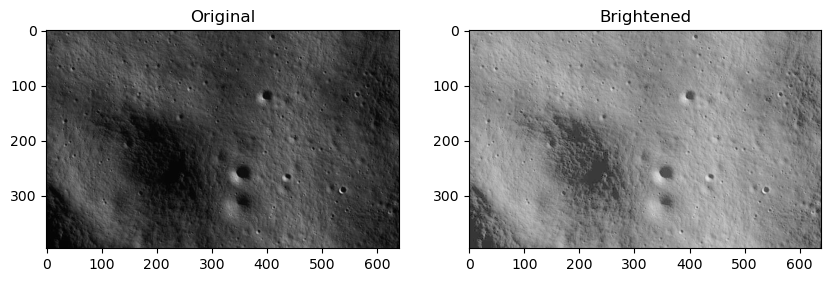

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def gamma_correction(image, gamma):
  
    image_normalized = image / 255.0
  
    corrected_image = np.power(image_normalized, gamma)

    corrected_image = np.uint8(corrected_image * 255)
    return corrected_image


li = cv2.imread("/Users/my475/OneDrive/Desktop/image 1.jpg", 0)


gamma_value = 0.4  
brightened_image = gamma_correction(li, gamma_value)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 10])


ax[0].imshow(li, cmap='gray')
ax[0].set_title("Original")


ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title("Brightened")


plt.show()


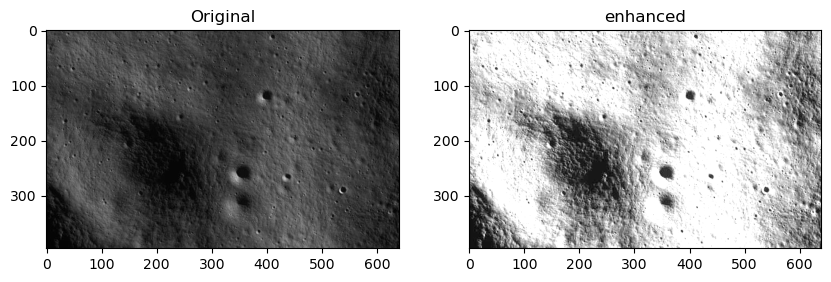

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def beta_correction(image, beta):

    corrected_image = cv2.convertScaleAbs(image, alpha=1, beta=beta)
    return corrected_image


li = cv2.imread("/Users/my475/OneDrive/Desktop/image 1.jpg", 0)


beta_value = 190 
brightened_image = beta_correction(li, beta_value)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 10])


ax[0].imshow(li, cmap='gray')
ax[0].set_title("Original")


ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title("enhanced")


plt.show()


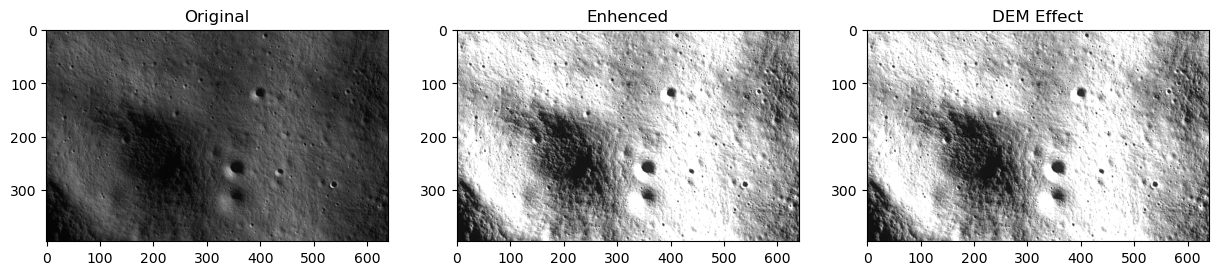

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def beta_correction(image, beta):
    
    corrected_image = cv2.convertScaleAbs(image, alpha=1, beta=beta)
    return corrected_image

def contrast_stretching(image, min_out=0, max_out=255):

    min_in = np.min(image)
    max_in = np.max(image)
    
   
    stretched_image = (image - min_in) / (max_in - min_in) * (max_out - min_out) + min_out
    return np.uint8(stretched_image)


li = cv2.imread("/Users/my475/OneDrive/Desktop/image 1.jpg", 0)


beta_value = 180  
brightened_image = beta_correction(li, beta_value)

dem_effect_image = contrast_stretching(brightened_image)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 10])


ax[0].imshow(li, cmap='gray')
ax[0].set_title("Original")


ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title("Enhenced")


ax[2].imshow(dem_effect_image, cmap='gray')
ax[2].set_title("DEM Effect")


plt.show()


C:\Users\my475\AppData\Local\Temp\ipykernel_25892\3765327165.py:42: RuntimeWarning: invalid value encountered in cast
  dem_normalized = np.uint8(dem_normalized)


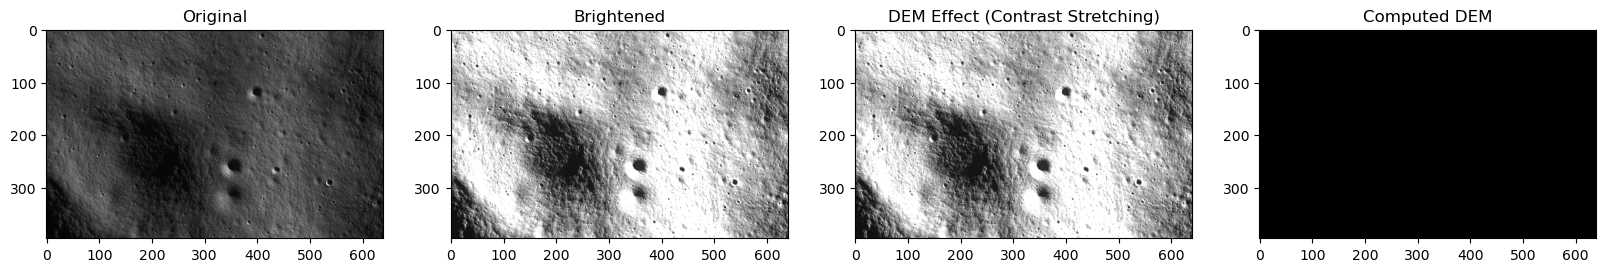

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def beta_correction(image, beta):

    corrected_image = cv2.convertScaleAbs(image, alpha=1, beta=beta)
    return corrected_image

def contrast_stretching(image, min_out=0, max_out=255):
   
    min_in = np.min(image)
    max_in = np.max(image)
    
    
    stretched_image = (image - min_in) / (max_in - min_in) * (max_out - min_out) + min_out
    return np.uint8(stretched_image)

def compute_dem(image):
    """Compute the Digital Elevation Model (DEM) from the image."""
    
    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
    
    
    disparity = stereo.compute(image, image)
    
    
    h, w = image.shape[:2]
    f = 0.8 * w  
    Q = np.float32([[1, 0, 0, -w/2],
                    [0, -1, 0, h/2],
                    [0, 0, 0, -f],
                    [0, 0, 1, 0]])

    points_3d = cv2.reprojectImageTo3D(disparity, Q)
    
    
    dem = points_3d[:, :, 2]  # Use the Z-coordinate as the elevation
    
    
    dem_normalized = cv2.normalize(dem, None, 0, 255, cv2.NORM_MINMAX)
    dem_normalized = np.uint8(dem_normalized)
    
    return dem_normalized


li = cv2.imread("/Users/my475/OneDrive/Desktop/image 1.jpg", 0)


beta_value = 180  
brightened_image = beta_correction(li, beta_value)


dem_effect_image = contrast_stretching(brightened_image)

dem_image = compute_dem(brightened_image)


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=[20, 10])


ax[0].imshow(li, cmap='gray')
ax[0].set_title("Original")


ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title("Brightened")


ax[2].imshow(dem_effect_image, cmap='gray')
ax[2].set_title("DEM Effect (Contrast Stretching)")


ax[3].imshow(dem_image, cmap='gray')
ax[3].set_title("Computed DEM")


plt.show()
